In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

문자열로 된 데이터 종류
- 범주형 데이터 (ex. 색상, 성별 etc.)
- 범주에 연결할 수 있는 임의의 문자열 (ex. 다홍색(비슷한 종류) >>> 빨강, 검점색(오타) >>> 검정)
- 구조화된 문자열 데이터 (ex. 도로명주소)
- 말 그대로 문자열 (ex. .txt 파일)

In [2]:
!tree data/aclImdb

폴더 PATH의 목록입니다.
볼륨 일련 번호가 0000007A 0639:BF7F입니다.
C:\USERS\RKSLA\DOCUMENTS\PYTHON\BASIC\ML\PPB\DATA\ACLIMDB
├─test
│  ├─neg
│  └─pos
└─train
    ├─neg
    └─pos


In [3]:
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target

print("TYPEOF text_train: ", type(text_train))
print("SIZEOF text_train: ", len(text_train))
print("text_train[6]: \n ", text_train[6])

TYPEOF text_train:  <class 'list'>
SIZEOF text_train:  25000
text_train[6]: 
  b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [4]:
text_train = [doc.replace(b"<br />", b"") for doc in text_train]

In [5]:
print("클래스별 샘플 수 (TRAIN): ", np.bincount(y_train))

클래스별 샘플 수 (TRAIN):  [12500 12500]


In [6]:
reviews_test = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target

print("테스트 데이터의 문서 수: ", len(text_test))
print("클래스별 샘플 수 (TEST): ")

테스트 데이터의 문서 수:  25000
클래스별 샘플 수 (TEST): 


In [7]:
text_test = [doc.replace(b"<br />", b"") for doc in text_test]

# BOW (Bag of Words)

과정
1. 토큰화: 각 문서를 문서에 포함된 단어(토큰)로 나눈다. 이 때 기준은 띄어쓰기, 점 따위로 한다
2. 어휘 사전 구축: 모든 문서에 나타난 모든 단어의 어휘를 모으고 번호를 매긴다. 순서는 알파벳 순으로 한다
3. 인코딩: 어휘 사전의 단어가 문서마다 몇 번이나 나타나는지를 센다


In [8]:
bards_words = [
    "the fool doth think he is wise, ", 
    "but the wise man knows himself to be a fool"
]

In [9]:
"""
    feature_extraction.text.CountVectorizer: sklearn의 BOW 변환 도구
    
    상세 동작
        1. vect.fit(문자열) 결과는 다음과 같다
            1.1 전달한 문자열을 단어 경계 단위로 나눈다. 이 때 모든 단어는 소문자로 바꾼다
            1.2 추출한 단어 목록의 unique 목록을 만들어 알파벳 순으로 정렬한다
            
        2. vect.transform(문자열) 의 결과는 다음과 같다
            2.1 문자열을 희소 행렬로 바꾼다
            2.2 ndarray일 때 값은 전달한 문자열에 해당 위치 단어가 몇 회 출현하는지에 대한 횟수다
"""

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [10]:
"""
    vect.vocabulary_: BOW에 있는 단어 종류를 사전 형식으로 나타냄
"""

print("어휘 사전의 크기: ", len(vect.vocabulary_))
print("어휘 사전의 내용: \n", vect.vocabulary_)

어휘 사전의 크기:  13
어휘 사전의 내용: 
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [11]:
bag_of_words = vect.transform(bards_words)
print("BOW: ", repr(bag_of_words))

BOW:  <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [12]:
print("BOW TO NDARRAY: \n", bag_of_words.toarray())

BOW TO NDARRAY: 
 [[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [13]:
wrds = pd.Series(bards_words[0].split(" ")[ : -1])
wrds

0      the
1     fool
2     doth
3    think
4       he
5       is
6    wise,
dtype: object

In [14]:
wrds[6] = wrds[6][ : -1]
wrds

0      the
1     fool
2     doth
3    think
4       he
5       is
6     wise
dtype: object

In [15]:
print(wrds.sort_values().to_list())
print(bag_of_words.toarray()[0])
print(vect.vocabulary_)

['doth', 'fool', 'he', 'is', 'the', 'think', 'wise']
[0 0 1 1 1 0 1 0 0 1 1 0 1]
{'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [16]:
v2 = CountVectorizer()
v2.fit(["what is your major malfunction"])

v2.transform(['what you think is what you can be']).toarray()

array([[1, 0, 0, 2, 0]], dtype=int64)

In [17]:
kor_wrds = ["안녕하세요 저는 트위치에서 방송을 하고 있는 스트리머"]

kv = CountVectorizer()
kv.fit(kor_wrds)

CountVectorizer()

In [18]:
print("어휘 사전의 크기: ", len(kv.vocabulary_))
print("어휘 사전의 내용: \n", kv.vocabulary_)

어휘 사전의 크기:  7
어휘 사전의 내용: 
 {'안녕하세요': 2, '저는': 4, '트위치에서': 5, '방송을': 0, '하고': 6, '있는': 3, '스트리머': 1}


In [19]:
kr_bows = vect.transform(kor_wrds)
print("KR_BOW: ", repr(kr_bows))

KR_BOW:  <1x13 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>


In [20]:
print("KR_BOW TO NDARRAY: \n", kr_bows.toarray())

KR_BOW TO NDARRAY: 
 [[0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [21]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train: \n", repr(X_train))

X_train: 
 <25000x75911 sparse matrix of type '<class 'numpy.int64'>'
	with 3431163 stored elements in Compressed Sparse Row format>


In [22]:
feature_names = vect.get_feature_names_out()

print("특성 개수: ", len(feature_names))
print("특성 [0 : 20]: ", feature_names[ : 20])
print("특성 [20010 : 20030]: ", feature_names[20010 : 20030])
print("특성 [ : : 2000]: ", feature_names[ : : 2000])

특성 개수:  75911
특성 [0 : 20]:  ['00' '000' '0000000000001' '00001' '00015' '000s' '001' '003830' '006'
 '007' '0079' '0080' '0083' '0093638' '00am' '00pm' '00s' '01' '01pm' '02']
특성 [20010 : 20030]:  ['doppelgangers' 'doppelgänger' 'dopplebangers' 'doppleganger' 'doppler'
 'dopy' 'doqui' 'dor' 'dora' 'dorado' 'dorama' 'doran' 'dorcas' 'dorcey'
 'dorday' 'dore' 'doreen' 'doremus' 'doren' 'dorf']
특성 [ : : 2000]:  ['00' 'adultery' 'appearence' 'bang' 'blissfully' 'burress' 'chaulk'
 'compensations' 'crossfire' 'derboiler' 'dop' 'empty' 'falling' 'formats'
 'gisbourne' 'hallucinogenics' 'honore' 'inferenced' 'johnston' 'laconic'
 'looping' 'matlin' 'modelling' 'nerdish' 'orion' 'periphery' 'preached'
 'raha' 'resolving' 'salli' 'shaffer' 'smurfs' 'stereotypic'
 'synchronized' 'tirard' 'una' 'venantini' 'whycome']


#### 특성 추출 개선 전 rough data 그대로 썼을 때의 결과

특성 추출 전에는 단수형/복수형을 서로 다른 단어로 인식하게되어 성능 저하가 발생할 수 있다

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, n_jobs=-1)
print("MEAN(CROSS_VAL): {:.2f}".format(np.mean(scores)))

MEAN(CROSS_VAL): 0.88


In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [10**x for x in range(-3, 2)]}

grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, n_jobs=-1)
grid.fit(X_train, y_train)
print("BEST CROSS VAL SCORE: {:.2f}".format(grid.best_score_))
print("BEST PARAMS: ", grid.best_params_)

BEST CROSS VAL SCORE: 0.89
BEST PARAMS:  {'C': 0.1}


In [25]:
X_test = vect.transform(text_test)
print("TEST_SCORE: {:.2f}".format(grid.score(X_test, y_test)))

TEST_SCORE: 0.88


In [26]:
np.mean(grid.cv_results_['mean_fit_time'])

36.60111637115479

### 특성 추출

#### 1. min_df: 최소 n개 문서에서 나타난 단어만 포함

In [27]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)

print("min_df로 제한한 X_train: ", repr(X_train))

min_df로 제한한 X_train:  <25000x27264 sparse matrix of type '<class 'numpy.int64'>'
	with 3352876 stored elements in Compressed Sparse Row format>


In [28]:
feature_names = vect.get_feature_names_out()

print("FEATURE [ : 50] \n", feature_names[ : 50])
print("20010 ~ 20030 \n", feature_names[20010 : 20030])
print("[ : : 700] \n", feature_names[ : : 700])

FEATURE [ : 50] 
 ['00' '000' '007' '00s' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10'
 '100' '1000' '100th' '101' '102' '103' '104' '105' '107' '108' '10s'
 '10th' '11' '110' '112' '116' '117' '11th' '12' '120' '12th' '13' '135'
 '13th' '14' '140' '14th' '15' '150' '15th' '16' '160' '1600' '16mm' '16s'
 '16th']
20010 ~ 20030 
 ['repetition' 'repetitions' 'repetitious' 'repetitive' 'rephrase'
 'replace' 'replaced' 'replacement' 'replaces' 'replacing' 'replay'
 'replayed' 'replaying' 'replays' 'replete' 'replica' 'replicas'
 'replicate' 'replied' 'replies']
[ : : 700] 
 ['00' 'affectionate' 'appropriate' 'barbet' 'blur' 'butch' 'cheery'
 'commit' 'courtroom' 'deconstruct' 'disgraceful' 'dvr' 'escort' 'fella'
 'freezing' 'gorillas' 'havana' 'hunk' 'insist' 'juice' 'left' 'mafia'
 'met' 'musicals' 'occult' 'parliament' 'pleasence' 'prop' 'recites'
 'revisionist' 'sassy' 'shedding' 'sniff' 'stems' 'swear' 'thugs' 'tween'
 'vanish' 'whale']


In [29]:
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [30]:
print("SIZEOF VOCABS: ", vect.get_feature_names_out().size)
print("BEST CV SCORE: ", grid.best_score_)
print("MEAN FIT TIME: ", np.mean(grid.cv_results_['mean_fit_time']))
print("MAX FIT TIME: ", np.max(grid.cv_results_['mean_fit_time']))
print("MIN FIT TIME: ", np.min(grid.cv_results_['mean_fit_time']))

SIZEOF VOCABS:  27264
BEST CV SCORE:  0.8880399999999999
MEAN FIT TIME:  17.052639417648315
MAX FIT TIME:  36.65132074356079
MIN FIT TIME:  1.835963201522827


In [31]:
np.mean(grid.cv_results_['mean_fit_time'])

17.052639417648315

최소 출현 문서 수로 규제했을 때의 효과
1. 성능이 좋아진 것은 아니다
2. 대신 단어장 크기가 줄어 훈련 시간이 줄었다

#### 2. 불용어 제외: 불필요한 관사, 조사, 전치사, 접속사 등은 사전에서 제외

In [32]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

print("SIZEOF STOPWORDS: ", len(ENGLISH_STOP_WORDS))
print(list(ENGLISH_STOP_WORDS)[ : : 10])

SIZEOF STOPWORDS:  318
['front', 'upon', 'while', 'wherein', 'because', 'no', 'keep', 'formerly', 'namely', 'latter', 'the', 'ten', 'to', 'myself', 'am', 'with', 'by', 'becomes', 'yourselves', 'also', 'four', 'seemed', 'whom', 'other', 'else', 'can', 'towards', 'nowhere', 'both', 'sixty', 'everything', 'for']


In [33]:
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print(repr(X_train))

<25000x26959 sparse matrix of type '<class 'numpy.int64'>'
	with 2149073 stored elements in Compressed Sparse Row format>


In [34]:
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [35]:
print("SIZEOF VOCABS: ", vect.get_feature_names_out().size)
print("BEST CV SCORE: ", grid.best_score_)
print("MEAN FIT TIME: ", np.mean(grid.cv_results_['mean_fit_time']))
print("MAX FIT TIME: ", np.max(grid.cv_results_['mean_fit_time']))
print("MIN FIT TIME: ", np.min(grid.cv_results_['mean_fit_time']))

SIZEOF VOCABS:  26959
BEST CV SCORE:  0.883
MEAN FIT TIME:  3.793677930831909
MAX FIT TIME:  7.539033985137939
MIN FIT TIME:  0.6255908012390137


불용어 제외로 인한 효과
1. 여기서는 큰 효과를 볼 수 없다<br>
원인: 몇만 개 특성 중에서 300개 빠진다고 별로 티가 나지 않음

결론: 불용어 목록은 데이터만 보고 불용어를 골라내기 어려운 작은 데이터셋에서나 도움이 된다

#### 3. max_df: n% OR n개 이상의 문서에 출현하는 단어는 제거

In [36]:
"""
    max_df의 값은 0~1 사이의 실수 OR 정수
        0~1 사이의 실수 >>> %
        정수 >>> 문서 개수
"""

param_grid = [
    {
        'logistic__C': [10**x for x in range(-2, 3)]
    },
    {
        'vect__max_df': np.arange(0.1, 0.51, 0.1)
    }
]

In [37]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('logistic', LogisticRegression(max_iter=5000))
])

grid = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid.fit(text_test, y_train)

GridSearchCV(estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('logistic',
                                        LogisticRegression(max_iter=5000))]),
             n_jobs=-1,
             param_grid=[{'logistic__C': [0.01, 0.1, 1, 10, 100]},
                         {'vect__max_df': array([0.1, 0.2, 0.3, 0.4, 0.5])}])

In [38]:
vocabs = grid.best_estimator_.named_steps['vect'].get_feature_names_out()

In [39]:
print("VOCABS IN BEST ESTIMATOR: \n", vocabs[ : : 500])
print("SIZEOF VOCABS: ", vocabs.size)

print("BEST CV SCORE: ", grid.best_score_)
print("MEAN FIT TIME: ", np.mean(grid.cv_results_['mean_fit_time']))
print("MAX FIT TIME: ", np.max(grid.cv_results_['mean_fit_time']))
print("MIN FIT TIME: ", np.min(grid.cv_results_['mean_fit_time']))

VOCABS IN BEST ESTIMATOR: 
 ['00' '1hour17min' '80ish' 'acclaiming' 'adventures' 'aking' 'amass'
 'angsting' 'appomatox' 'arto' 'attribute' 'bachelorette' 'barbican'
 'beaudelaire' 'berenice' 'birkenau' 'bludgeon' 'bootmen' 'brazul'
 'brutalization' 'butler' 'canister' 'case' 'cerkassov' 'cheirel' 'chump'
 'clifton' 'collectivity' 'comprehends' 'conspicuous' 'cormann' 'cramer'
 'crueler' 'dadaism' 'deaprtment' 'delboys' 'descendeth' 'dickson'
 'discretely' 'dixie' 'douglas' 'dudeology' 'ebbs' 'elena' 'endeavours'
 'erases' 'evilly' 'exquisit' 'fantastiks' 'ferociously' 'firsthand'
 'fluorescent' 'foy' 'fuccons' 'gangsterism' 'geostigma' 'glimpse'
 'gothamites' 'grinning' 'guzzling' 'hansika' 'headlong' 'herucles'
 'hokuto' 'hotheaded' 'hyperkinesis' 'impalements' 'indeterminacy'
 'inquiries' 'intolerance' 'iversen' 'jetliner' 'junagadh75' 'keepsake'
 'kizilirmak' 'kurds' 'larva' 'leila' 'limburger' 'lonelyhearts'
 'lunkhead' 'mails' 'marceau' 'matriarchal' 'medak' 'metaphorically'
 'mi

# tf-idf: 의미를 고려한 방식

아이디어: 특정 문서에서 빈출하는 단어는 그 문서의 내용을 잘 설명하는 단어라고 보는 것<br>
ex. TXN의 매출 구성에서는 analog, embedded processing이 나타나는 것<br>
구현: 특정 문서에서 빈출하는 단어에 가중치를 주는 방식<br>
sklearn에서의 tf-idf 변한은 다음과 같이 한다
> $\mbox{tfidf}(w, d) = \mbox{tf}(log({N+1 \over N_w + 1}) + 1)$

여기서
- $N$: 훈련 세트에 있는 문서의 개수
- $N_w$: 단어 $w$ 나타난 훈련 세트의 문서 개수
- tf(단어 빈도 수): 단어 $w$가 대상 문서 $d$에 나타난 횟수

In [40]:
"""
    sklearn에서는 TfidfVectorizer, TfidfTransformer로 tf-idf를 구현한다
    
    TfidfTransformer: CountVectorizer가 만든 희소 행렬로 tf-idf 계산
    TfidfVectorizer: CountVectorizer의 서브클래스로, CountVectorizer로 BOW를 만든 뒤 TfidfTransformer로 tf-idf 변환을 한다
    
    이 때, 둘 다 tf-idf 계산을 한 다음 유클리디안 노름이 1이 되도록 각 문서 벡터의 스케일을 바꾼다 >>> L2 정규화
    이 작업은 norm 매개변수에서 l2, l1 중 하나로 설정할 수 있다
    
    tf-idf는 훈련 데이터의 통계적 속성을 사용한다 >>> 테스트셋 정보가 새면 안된다
"""

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))
param_grid = {'logisticregression__C': [10**x for x in range(-3, 3)]}

grid = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid.fit(text_train, y_train)
print("BEST CROSS VAL SCORE: {:.2f}".format(grid.best_score_))

BEST CROSS VAL SCORE: 0.89


#### 주의: tf-idf는 비지도 학습이므로 tf-idf에서의 중요도가 클래스 레이블과 꼭 관계있는 것은 아니다

In [41]:
vectorizer = grid.best_estimator_.named_steps['tfidfvectorizer']

X_train = vectorizer.transform(text_train)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names_out())

print("LOW-tfidf FEATURES: \n", feature_names[sorted_by_tfidf[ : 20]])
print("HIGH-tfidf FEATURES: \n", feature_names[sorted_by_tfidf[-20 : ]])

LOW-tfidf FEATURES: 
 ['suplexes' 'gauche' 'hypocrites' 'oncoming' 'galadriel' 'songwriting'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
HIGH-tfidf FEATURES: 
 ['gadget' 'zatoichi' 'demons' 'lennon' 'bye' 'sucks' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


In [42]:
""" tf-idf가 낮은 단어를 보면 대부분 관사, 접속사, 전치사거나 너무 자주 나오는 단어이다 """

sorted_by_idf = np.argsort(vectorizer.idf_)
print("LOWEST-idf FEATURES: \n", feature_names[sorted_by_idf[ : 100]])

LOWEST-idf FEATURES: 
 ['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


# 모델 계수 조사

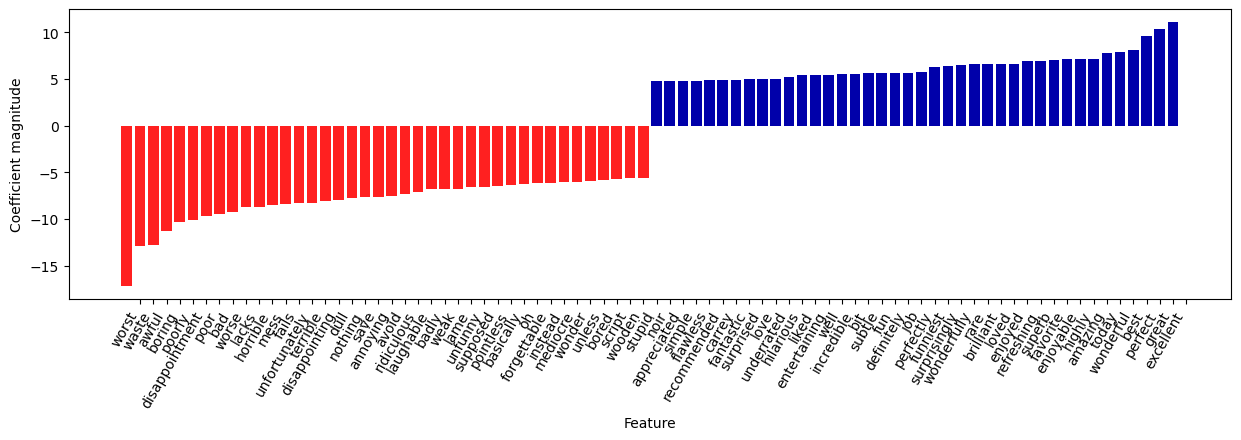

In [43]:
""" 모델 계수가 가장 큰 단어와 작은 단어를 부정/긍정 리뷰 별로 나눠보면 """

mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps['logisticregression'].coef_[0],
    feature_names, n_top_features=40
)

In [44]:
print('bards_words: \n', bards_words)

bards_words: 
 ['the fool doth think he is wise, ', 'but the wise man knows himself to be a fool']


# n-그램: 문맥을 고려할 수 있는 방법

BOW의 한계: 한 단어씩 나누면서 문맥 고려가 힘들어진다<br>
<h5>ex. "좋았다가 말았다"에서 좋았다와 "친절해서 좋았다"에서 "좋았다"의 문맥은 완전히 다르다</h5><br>
<h5>ex2. "수원역이 엎어지면 코 닿는 거리다"를 하나씩만 쪼개면 ["수원역", 엎다", "코", "닿다", "거리"]가 되는데 이러면 "엎어지면 코 닿는 거리다" == "가깝다" 라는 의미를 알 수 없다</h5><br>

n-그램은 단어 딱 하나만 고려하는 것이 아닌, 옆에 있는 단어 n개도 같이 고려하는 방법이다 <br>
\>>> 자기 하나 + 옆에 하나면 바이그램, 옆에 두 개면 트라이그램, n개면 n그램 이런 식

참고
- 이론상 바이그램 수는 유니그램 수의 제곱, 트라이그램 수는 유니그램의 세제곱이 된다<br>
즉 n그램이 길어질수록 너무 구체적인 특성이 많아져 과대적합될 수 있다
- d 개의 단어로 이뤄진 문장에서 최대 n그램 수는 중복 순열의 수이므로 $d^n$이 된다

In [47]:
""" # 1. 유니그램: ngram_range=(1, 1) (기본 옵션)"""

cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("어휘 사전 크기: ", len(cv.vocabulary_))
print(cv.get_feature_names_out())

어휘 사전 크기:  13
['be' 'but' 'doth' 'fool' 'he' 'himself' 'is' 'knows' 'man' 'the' 'think'
 'to' 'wise']


In [49]:
""" # 2. 바이그램만 추출: ngram_range(최소=2, 최대=2) """

cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("어휘 사전 크기: ", len(cv.vocabulary_))
print(cv.get_feature_names_out())

어휘 사전 크기:  14
['be fool' 'but the' 'doth think' 'fool doth' 'he is' 'himself to'
 'is wise' 'knows himself' 'man knows' 'the fool' 'the wise' 'think he'
 'to be' 'wise man']


In [50]:
""" # 3. 바이그램부터 트라이그램까지 추출: ngram_range=(최소=1, 최대3) """

cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("어휘 사전 크기: ", len(cv.vocabulary_))
print(cv.get_feature_names_out())

어휘 사전 크기:  39
['be' 'be fool' 'but' 'but the' 'but the wise' 'doth' 'doth think'
 'doth think he' 'fool' 'fool doth' 'fool doth think' 'he' 'he is'
 'he is wise' 'himself' 'himself to' 'himself to be' 'is' 'is wise'
 'knows' 'knows himself' 'knows himself to' 'man' 'man knows'
 'man knows himself' 'the' 'the fool' 'the fool doth' 'the wise'
 'the wise man' 'think' 'think he' 'think he is' 'to' 'to be' 'to be fool'
 'wise' 'wise man' 'wise man knows']


In [51]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))

param_grid = {
    'logisticregression__C': [10**x for x in range(-3, 3)],
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]
}

grid = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid.fit(text_train, y_train)

print("BEST CV SCORE: {:.2f}".format(grid.best_score_))
print("BEST PARAMS: ", grid.best_params_)

BEST CV SCORE: 0.91
BEST PARAMS:  {'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


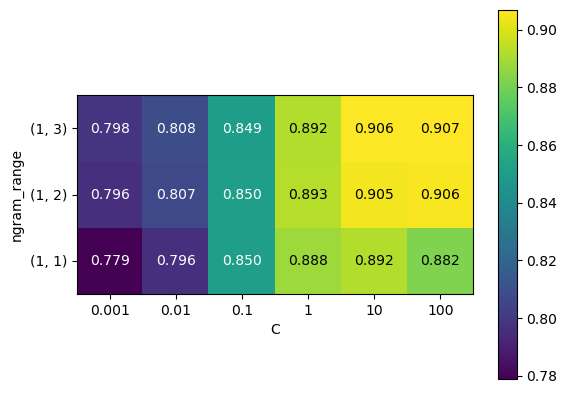

In [56]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T

heatmap = mglearn.tools.heatmap(
    scores,
    xlabel='C', ylabel='ngram_range',
    xticklabels=param_grid['logisticregression__C'], yticklabels=param_grid['tfidfvectorizer__ngram_range'],
    cmap='viridis',
    fmt="%.3f",
)

plt.colorbar(heatmap)
plt.show()

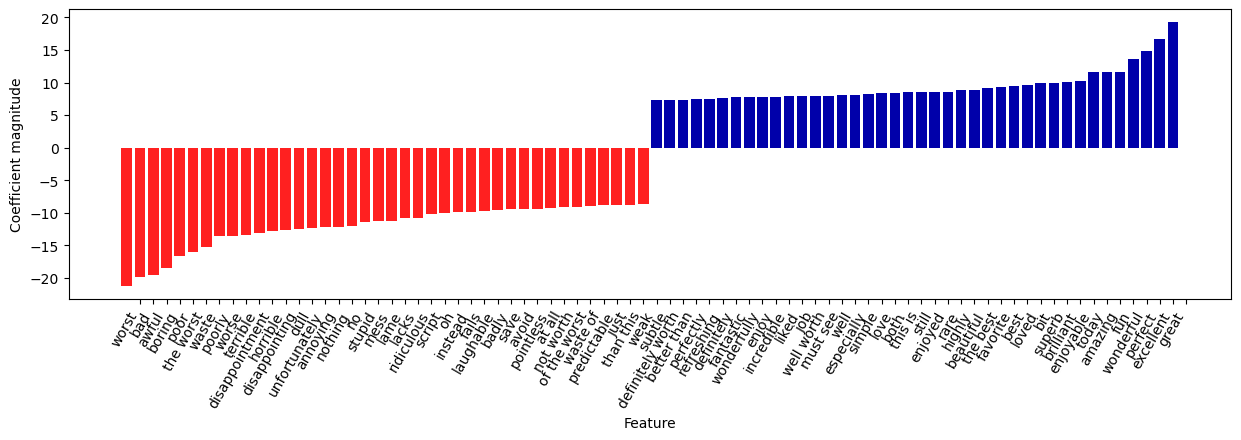

In [63]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names_out())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef[0], feature_names, n_top_features=40)

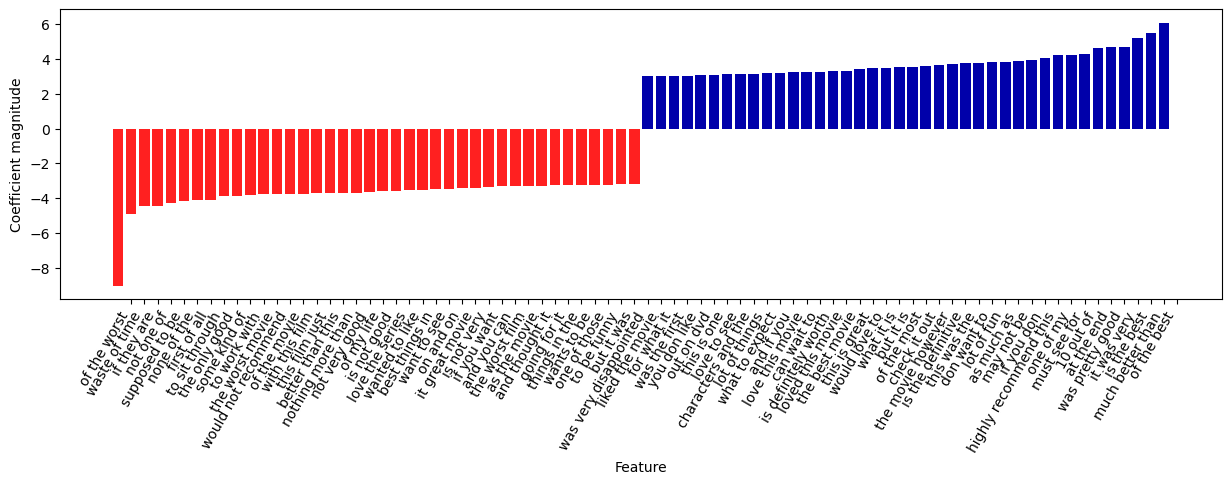

In [64]:
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3

mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=40)

# 고급 토큰화, 어간 추출, 표제어 추출

단순 단어 쪼개기의 한계: 품사를 온전히 구분하지 못한다 (ex. 먹다/먹기/먹을 수 있다)<br>
해결 방법: 단어를 어간으로 표현한다. 그 방법으로
1. 일일이 어미를 찾아 제외하는 규칙 기반 방식을 사용하거나 >>> 어간 추출
2. 단어의 형태 사전을 사용하고, 단어의 표준 형태(표제어)를 고려해 문장에서 단어의 역할을 고려한다 >>> 표제어 추출

\>>> 어간 추출과 표제어 추출은 일종의 정규화

In [65]:
import spacy
import nltk

print(nltk.__version__)
print(spacy.__version__)

3.7
3.5.3


In [67]:
en_nlp=  spacy.load('en_core_web_sm')
stemmer = nltk.stem.PorterStemmer()

def compare_normalization(doc):
    doc_spacy = en_nlp(doc)
    print("표제어: ")
    print([token.lemma_ for token in doc_spacy])
    print("어간: ")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [68]:
compare_normalization(
    u"Our meeting today was worse than yesterday, "
    "I'm scared of meeting the clients tomorrow"
)

표제어: 
['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', 'I', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow']
어간: 
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow']


결과 분석
- 표제어 추출: meeting(두번째 문장) > meet, worse > bad, was, am > be
- 어간 추출: meeting(전부) > meet, was > wa, worse > wors, am > 'm, scared > scare

처리 과정은 표제어 추출이 어간 추출보다 더 복잡하지만 성능은 표제어 추출이 어간 추출보다 좋다

In [70]:
"""
    sklearn에선 표제어 추출, 어간 추출 방법이 따로 없지만 
    CountVectorizor의 tokenizer 매개변수를 사용하여 문자열 토큰화 방법을 따로 지정할 수 있다
"""

en_nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma for token in doc_spacy]

lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

#### 기본 CountVectorizer를 사용했을 때와의 단어 사전 비교

In [71]:
X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape: ", X_train_lemma.shape)

X_train_lemma.shape:  (25000, 22231)


In [72]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape:", X_train.shape)

X_train.shape: (25000, 27264)


결과: 표제어 추출을 활용한 단어장 < 기본 단어장

In [73]:
""" 
    훈련셋 수를 줄였을 때의 표제어 추출의 성능 확인
    >>>
        표제어 추출은 일부 특성을 합치기 때문에 일종의 규제라고 할 수도 있다
        그래서 데이터셋이 작을 때에도 성능을 높여줄 수 있다
"""

from sklearn.model_selection import StratifiedShuffleSplit

param_grid = {'C': [10**x for x in range(-3, 3)]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99, train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=cv, n_jobs=-1)

grid.fit(X_train, y_train)
print("BEST CV SCORE(countervectorizer): ", grid.best_score_)

grid.fit(X_train_lemma, y_train)
print("BEST CV SCORE(lemma): ", grid.best_score_)

BEST CV SCORE(countervectorizer):  0.7186585858585859
BEST CV SCORE(lemma):  0.7143030303030302


# 토픽 모델링, 문서 군집화

토픽 모델링?
- 비지도 학습
- 문서를 하나 이상의 토픽으로 할당하는 작업
- 토픽을 할당한 후엔 군집화하는 문제가 된다

방법: 잠재 디레클레 할당(LDA: Latent Dirichlet Allocation)

### LDA

- 함께 자주 나타나는 단어의 토픽을 찾는 작업이다<br>
여기서 토픽은 반드시 포털 '정치', '문화', '게임' 같은 것이 아니라 PCA, NMF로 추출한 성분에 가깝다
- LDA는 각 문서에 토픽의 일부가 혼합되어 있다고 간주한다<br>
ex. 문화: (음악, 피아노, 무대, ...), 영화: (상영, 볼록버스터, 극장, ...)
- 이 때 동시에 나타날 것 같은 단어의 그룹만 있는 것은 아니다<br>
뉴스의 경우 같은 사건이어도 한 곳에선 "양보", 다른 한 곳에선 "굴종"이라고 표현할 수도 있다
- 토픽의 수를 바꾸면 NMF와 같이 완전히 다른 토픽이 나올 수도 있다

In [75]:
""" 시작 전 너무 많이 나오는 단어는 일단 제거 : 여기선 최대 15%로 설정 """

vect = CountVectorizer(max_features=10000, max_df=0.15)
X = vect.fit_transform(text_train)

In [79]:
""" 토픽을 10개만 추출했을 경우 """

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method='batch', max_iter=25, random_state=0, n_jobs=-1)

document_topics = lda.fit_transform(X)

In [80]:
print("lda.components_.shape", lda.components_.shape)

lda.components_.shape (10, 10000)


In [82]:
sorting = np.argsort(lda.components_, axis=1)[ : , : : -1]
feature_names = np.array(vect.get_feature_names_out())

mglearn.tools.print_topics(
    topics=range(10),
    feature_names=feature_names, 
    sorting=sorting,
    topics_per_chunk=5,
    n_words=10
)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
cast          role          show          didn          action        
role          john          funny         thought       effects       
comedy        wife          worst         10            series        
performance   plays         thing         saw           game          
funny         young         money         lot           fight         
plays         played        want          got           special       
actor         performance   actually      actors        original      
played        cast          re            wasn          star          
john          murder        nothing       am            fi            
performances  himself       stupid        though        sci           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
musi

In [83]:
""" 토픽의 수를 더 늘렸을 때: 한 100개정도? """

lda100 = LatentDirichletAllocation(
    n_components=100,
    learning_method='batch',
    max_iter=25,
    random_state=0, n_jobs=-1
)

document_topics100 = lda100.fit_transform(X)

In [84]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])

In [85]:
sorting = np.argsort(lda100.components_, axis=1)[ : , : : -1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(
    topics=topics, 
    feature_names=feature_names,
    sorting=sorting, topics_per_chunk=5, n_words=20
)

topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
woman         sex           james         nominated     ed            
husband       sexual        bond          gene          wood          
wife          violence      sean          andrews       billy         
daughter      nudity        williams      laura         kids          
girl          porn          harris        noir          right         
herself       women         jack          oscar         nelson        
doesn         female        hitchcock     frank         star          
gets          emma          polanski      father        baby          
married       erotic        robin         lena          bride         
goes          woman         connery       cop           adult         
wants         naked         apartment     dixon         fantasy       
young         soft          tenant        golden        zane          
friend

In [86]:
music = np.argsort(document_topics100[ : , 45])[ : : -1]

for i in music[ : 10] :
    print(b".".join(text_train[i].split(b".")[ : 2]) + b".\n")

b"With 'Twelve Monkeys' you need to pay attention, but if you do that you probably find a lot to appreciate. I know I did.\n"
b'NYC model Alison Parker (Cristina Raines) rents a room in an old brownstone where she meets a few bizarre neighbors and experiences some creepy hallucinations. As lawyer boyfriend Michael Lerman (Chris Sarandon) goes about making inquiries on her behalf, she struggles to maintain her sanity (not to mention her will to live) as her experiences take a toll on her physical, mental, and emotional health.\n'
b'Twelve Monkeys is an insane time-travelling, action packed movie that stars Bruce Willis who plays James Cole, a man who is sent back in time to collect information about the devastating plague that ensues in November of 1996. Unfortunately, he is sent back too far to the year 1990 where everyone believes that he is insane.\n'
b'Without a doubt, 12 MONKEYS is one of the best films of the Sci-fi genre and director Terry Gilliam is no stranger at pulling off su

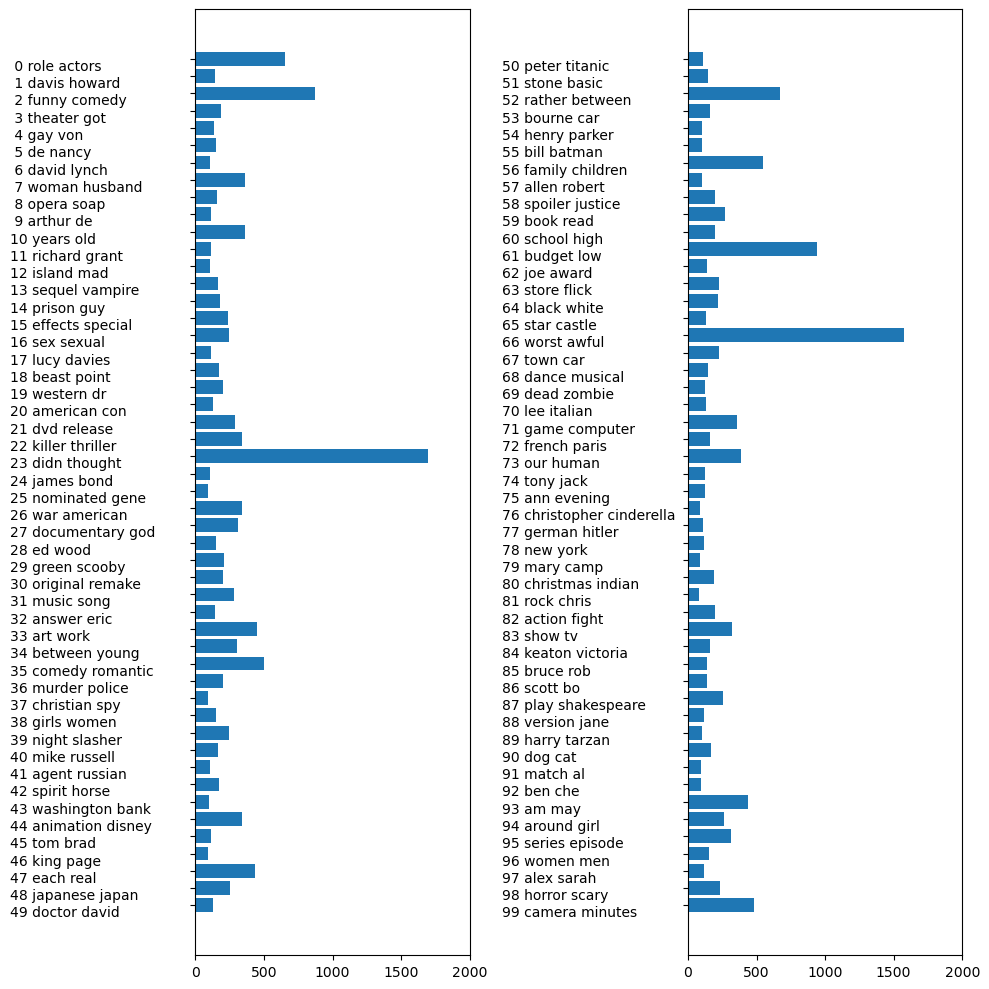

In [89]:
""" 토픽 가중치 조사 """

fig, ax = plt.subplots(1, 2, figsize=(10, 10))

topic_names = ["{:>2} ".format(i) + " ".join(words) for i, words in enumerate(feature_names[sorting[ : , : 2]])]

for col in [0, 1] :
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start : end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start : end], ha='left', va='top')
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
    
plt.tight_layout()

LDA와 같은 토픽 모델은 레이블이 없거나, 레이블이 있더라도 큰 규모의 텍스트 말뭉치를 해석하는데 좋다<br>
LDA는 확률적 알고리즘이기 때문에 random state를 바꾸면 결과도 달라진다
비지도학습이기 때문에 평가는 보수적으로 하고, 결과를 직접 보고 검증하는 것이 좋다
LDA.transform 결과는 특정 문서를 몇 개의 토픽으로 축소하는 것이라고 볼 수도 있기 때문에 특성의 수를 줄이는데도 사용할 수 있다. (특히 샘플이 적은데 특성은 많은 데이터 >>> 과대적합되기 쉽기 때문)